Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
from sklearn.cross_validation import train_test_split

df = pd.read_csv("gbm-data.csv")

Populating the interactive namespace from numpy and matplotlib


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df['Activity'], test_size=0.8, random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказаное значение.
* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

def log_loss_array(clf, X, y):
    log_loss_ar = []
    for i, y_pred in enumerate(clf.staged_decision_function(X)):
        y_pred = 1/ (1 + exp(-y_pred))
        log_loss_ar.append(log_loss(y, y_pred))
    return log_loss_ar

def gradient_boosting(learning_rate):
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=learning_rate)
    clf.fit_transform(X_train, y_train)
    return log_loss_array(clf, X_train, y_train), log_loss_array(clf, X_test, y_test)

learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
log_losses = []
for learning_rate in learning_rates:
    log_losses.append(gradient_boosting(learning_rate))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as fe

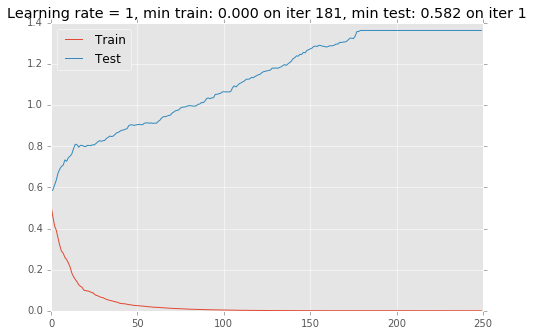

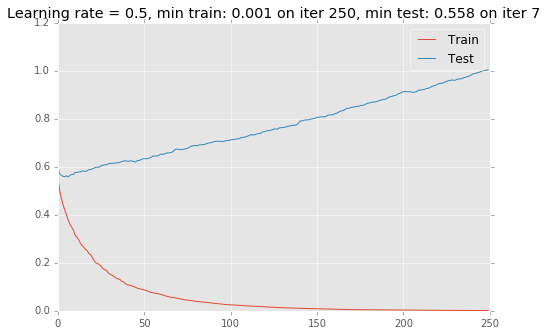

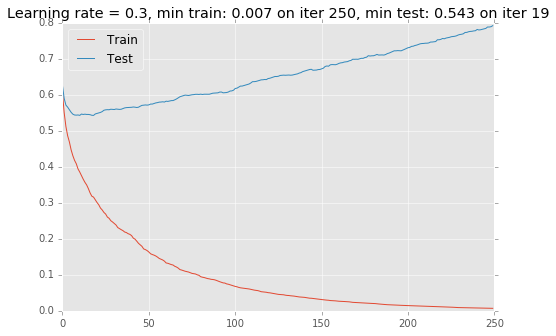

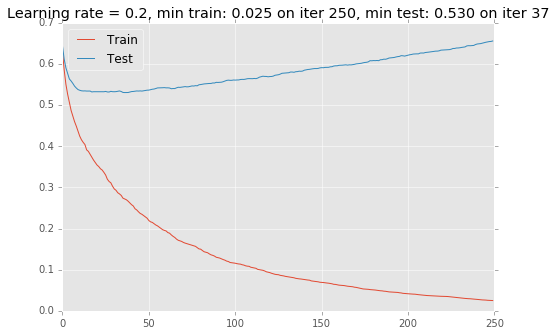

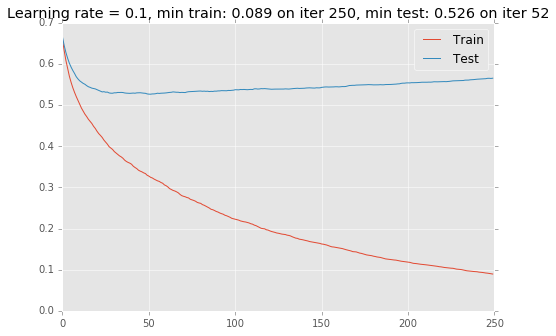

In [31]:
def plot_log_loss(learning_rate, train, test):
    f = pylab.figure()
    ax = f.add_axes([0, 0, 1, 1])
    m_train, m_test = min(train), min(test)
    ax.set_title("Learning rate = {0}, min train: {1:.3f} on iter {2}, min test: {3:.3f} on iter {4}"
                 .format(learning_rate, m_train, train.index(m_train) + 1, m_test, test.index(m_test) + 1))
    ax.plot(train, label="Train")
    ax.plot(test, label="Test")
    ax.legend(loc="best", fancybox=True)
    f.show()

for i in xrange(len(learning_rates)):
    plot_log_loss(learning_rates[i], *log_losses[i])

In [32]:
with open("submissions/5_2.txt", "w") as f:
    f.write("overfitting")
with open("submissions/5_3.txt", "w") as f:
    f.write("0.53 37")

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=37, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
log_loss(y_test, y_pred)

0.54091190993698968

In [30]:
with open("submissions/5_4.txt", "w") as f:
    f.write("0.54")